**Set environment**

In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
library(UpSetR)
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
fdiry = file.path(FD_RES, "results", "region", "annotation_enhancer_merge")
fname = "enhancer_merge.region.starrmpra_crispri_atac.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Assay_Type", "Assay_Label")
dat = read_tsv(fpath, col_names=cnames, show_col_types=FALSE)
dat = dat %>% 
    dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End)) %>%
    dplyr::select(Chrom, Start, End, Region, Assay_Type, Assay_Label)

dat_region_merge_import = dat
print(dim(dat))
head(dat)

[1] 350813      6


Chrom,Start,End,Region,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,ATAC,ATAC
chr1,14253,14645,chr1:14253-14645,ATAC,ATAC
chr1,16015,16477,chr1:16015-16477,ATAC,ATAC
chr1,17237,17772,chr1:17237-17772,ATAC,ATAC
chr1,28903,29613,chr1:28903-29613,ATAC,ATAC
chr1,30803,31072,chr1:30803-31072,ATAC,ATAC


## Arrange and summary

In [3]:
dat = dat_region_merge_import
for (x in unique(dat$Assay_Type))
    print(x)

[1] "ATAC"
[1] "ASTARR,ATAC"
[1] "ATAC,WSTARR"
[1] "LMPRA"
[1] "ATAC,CRISPRi-Growth"
[1] "ASTARR,ATAC,LMPRA,WSTARR"
[1] "WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth,LMPRA,WSTARR"
[1] "ATAC,LMPRA"
[1] "ASTARR,ATAC,LMPRA"
[1] "ATAC,LMPRA,WSTARR"
[1] "ASTARR,ATAC,WSTARR"
[1] "ASTARR"
[1] "CRISPRi-Growth"
[1] "ASTARR,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth"
[1] "CRISPRi-Growth,WSTARR"
[1] "ATAC,CRISPRi-Growth,LMPRA,WSTARR"
[1] "ATAC,CRISPRi-Growth,WSTARR"
[1] "LMPRA,WSTARR"
[1] "ATAC,CRISPRi-Growth,LMPRA"
[1] "ASTARR,ATAC,CRISPRi-Growth,WSTARR"
[1] "ATAC,CRISPRi-E2G,LMPRA"
[1] "ASTARR,ATAC,CRISPRi-Growth,LMPRA"
[1] "ASTARR,LMPRA,WSTARR"
[1] "ASTARR,CRISPRi-E2G,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-E2G,LMPRA,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-E2G,LMPRA"
[1] "ASTARR,CRISPRi-Growth"
[1] "ASTARR,LMPRA"
[1] "CRISPRi-Growth,LMPRA"
[1] "CRISPRi-E2G,WSTARR"
[1] "ATAC,CRISPRi-E2G"
[1] "ASTARR,ATAC,CRISPRi-E2G,WSTARR"
[1] "CRISPRi-E2G,LMPRA"
[1] "ATAC,CRISPRi-E2G,LMPRA,WSTARR"
[1] "ATAC,CRISPRi-E2G,WSTARR"
[1]

In [4]:
dat = dat_region_merge_import
dat = dat %>% tidyr::separate_longer_delim(Assay_Type, ",")

dat_region_merge_arrange = dat
print(dim(dat))
head(dat)

[1] 449233      6


Chrom,Start,End,Region,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,ATAC,ATAC
chr1,14253,14645,chr1:14253-14645,ATAC,ATAC
chr1,16015,16477,chr1:16015-16477,ATAC,ATAC
chr1,17237,17772,chr1:17237-17772,ATAC,ATAC
chr1,28903,29613,chr1:28903-29613,ATAC,ATAC
chr1,30803,31072,chr1:30803-31072,ATAC,ATAC


**Check results**

In [5]:
vec = paste0("chr", c(1:22, "X"))
dat = dat_region_merge_arrange
dat = dat %>% dplyr::filter(Chrom %in% vec, Assay_Type == "TMPRA")
table(dat$Chrom)


chr11 chr16  chr2 chr20  chr8  chrX 
 2115   783   968  1150  1378  1426 

## Upset plot by Assay Type

In [6]:
dat = dat_region_merge_arrange
lst = split(dat$Region, dat$Assay_Type)

lst_region = lst
print(length(lst))
lapply(lst, length)

[1] 8


$ASTARR
[1] 19646

$ATAC
[1] 247443

$`CRISPRi-E2G`
[1] 380

$`CRISPRi-Growth`
[1] 6171

$`CRISPRi-HCRFF`
[1] 75

$LMPRA
[1] 38910

$TMPRA
[1] 7820

$WSTARR
[1] 128788

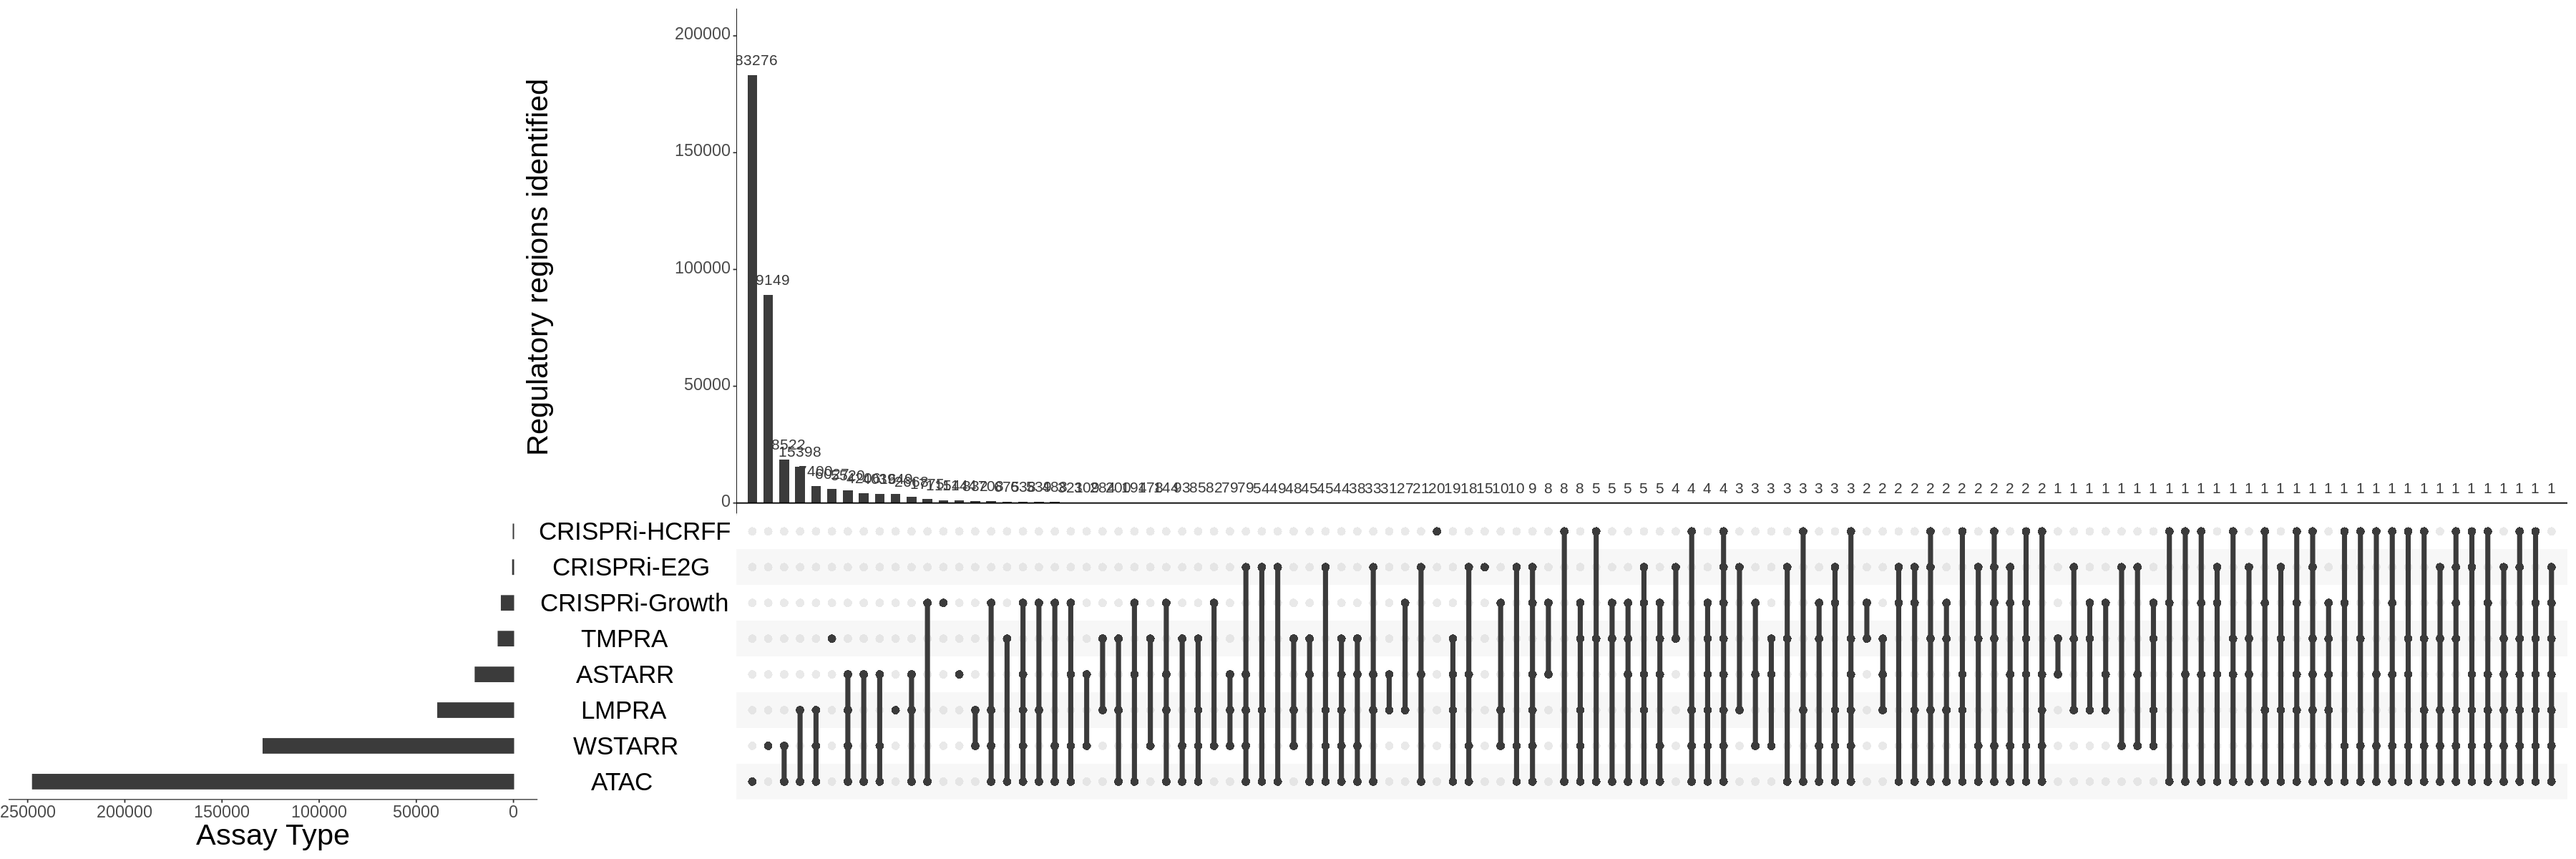

In [38]:
lst = lst_region

options(repr.plot.height=10, repr.plot.width=30)
upset(fromList(lst), 
      order.by = "freq", 
      nsets = 8,
      nintersects = NA,
      number.angles = 0,
      point.size = 3, 
      line.size  = 2,
      mb.ratio = c(0.6, 0.4),
      mainbar.y.label = "Regulatory regions identified", 
      sets.x.label    = "Assay Type", 
      text.scale = c(
          3, # upper barplot y axis title
          2, # upper barplot y axis text
          3, # left  barplot y axis title
          2, # left  barplot y axis text
          3, # set title
          2  # upper barplot count number
      )
)

* CRISPRi-HCRFF : 79 
* CRISPRi-E2G : 398 
* TMPRA : 2972 
* CRISPRi-Growth : 6231 
* ASTARR : 25117 
* LMPRA : 41008 
* WSTARR : 135914 


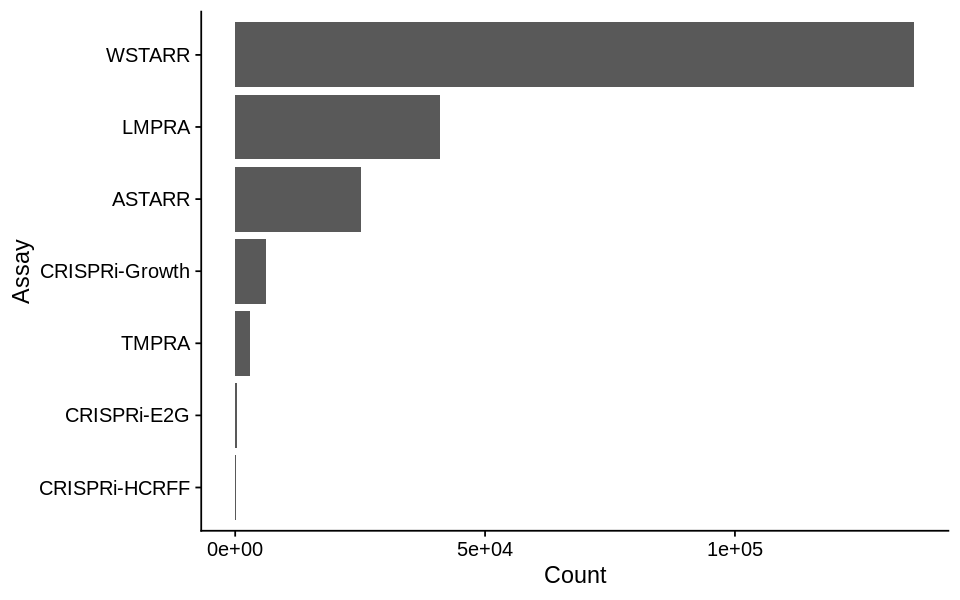

In [101]:
lst = lst_summary
lst = lapply(lst, length)
vec = unlist(lst)
vec = sort(vec)
for (idn in names(vec)){
    cat("*", idn, ":", vec[idn], "\n")
}

# ++++++++++++++++++++++++++++++++++++++++++++
dat = data.frame(
    "Assay"  = names(vec),
    "Count"  = vec
)
dat = dat %>% 
    dplyr::arrange(Count) %>% 
    dplyr::mutate(Assay=factor(Assay, levels=Assay))
gpt = ggplot(dat, aes(x=Assay, y=Count)) + 
    geom_col() + 
    coord_flip() +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

## Upset plot by Assay Group (STARR / MPRA / CRISPRi / ATAC)

In [69]:
dat = dat_region_merge_arrange
table(dat$Assay_Type)


        ASTARR           ATAC    CRISPRi-E2G CRISPRi-Growth  CRISPRi-HCRFF 
         19646         247443            380           6171             75 
         LMPRA          TMPRA         WSTARR 
         38910           7820         128788 

In [70]:
dat = dat_region_merge_arrange
dat = dat %>% 
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "CRISPRi"),
            "CRISPRi",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "STARR"),
            "STARR",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "MPRA"),
            "MPRA",
            Assay_Type
        )
    )
dat_region_merge_summary = dat

table(dat$Assay_Type)


   ATAC CRISPRi    MPRA   STARR 
 247443    6626   46730  148434 

In [80]:
dat = dat_region_merge_summary
lst = split(dat$Region, dat$Assay_Type)
lst = lapply(lst, function(vec){
    vec = unique(vec)
    return(vec)
})
lst_region = lst

print(length(lst))
lapply(lst, length)

[1] 4


$ATAC
[1] 247443

$CRISPRi
[1] 6572

$MPRA
[1] 46012

$STARR
[1] 137325

In [87]:
vec = c(
    lst_region[["STARR"]],
    lst_region[["MPRA"]],
    lst_region[["CRISPRi"]]
)
res = vec %in% lst_region[["ATAC"]]
print(length(unique(vec)))
print(sum(res))
print(mean(res))

[1] 167537
[1] 85208
[1] 0.4486781


In [82]:
dat = dat_region_merge_summary
vec = dat$Region
length(unique(vec))

[1] 350813

In [92]:
for (idn in names(lst_region)){
    vec = lst_region[[idn]]
    res = vec %in% lst_region[["ATAC"]]
    cat(idn, "\n")
    print(length(res))
    print(sum(res))
    print(mean(res))
    cat("\n")
}

ATAC 
[1] 247443
[1] 247443
[1] 1

CRISPRi 
[1] 6572
[1] 5238
[1] 0.7970177

MPRA 
[1] 46012
[1] 34528
[1] 0.7504129

STARR 
[1] 137325
[1] 45442
[1] 0.3309084



In [91]:
print(45442 / 137325)
print(34528 /  46012)
print( 5238 /   6572)

[1] 0.3309084
[1] 0.7504129
[1] 0.7970177


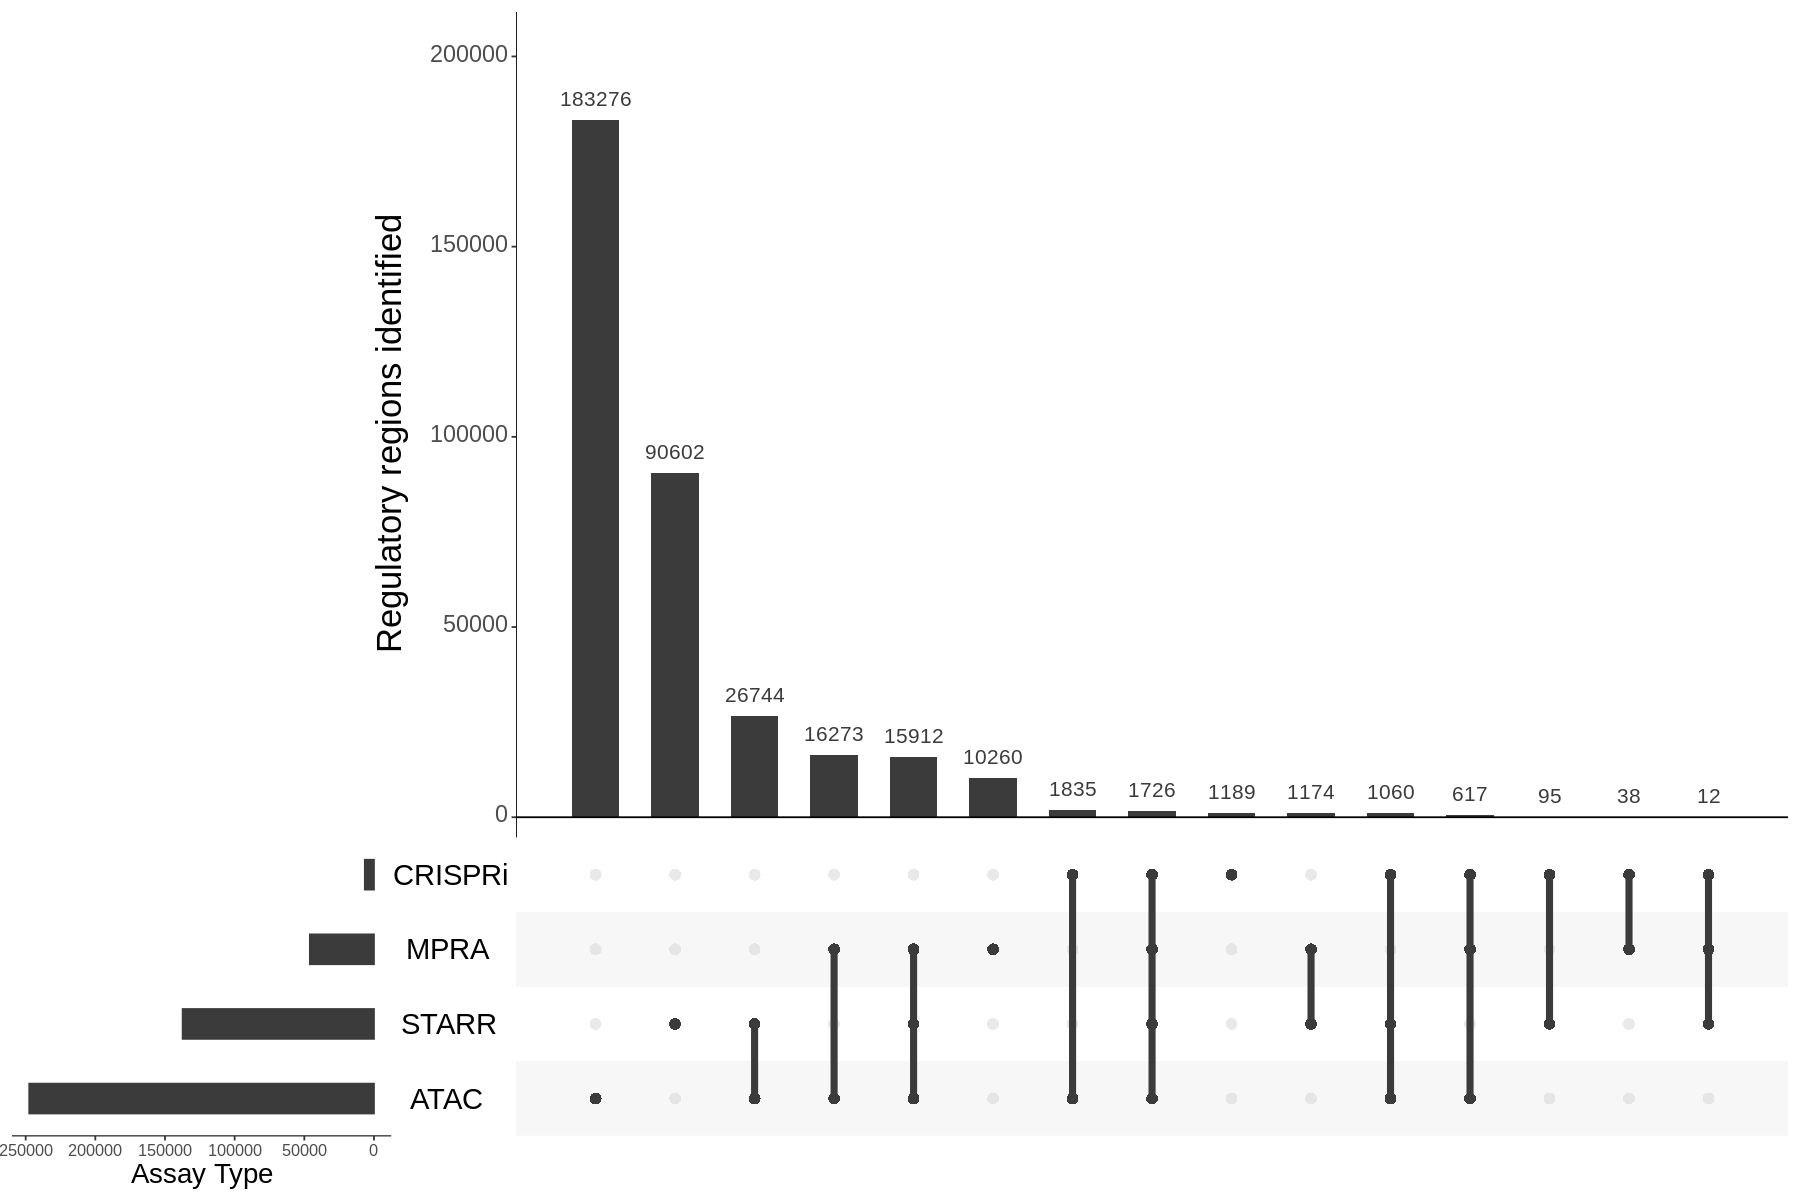

In [73]:
lst = lst_region

options(repr.plot.height=10, repr.plot.width=15)
upset(fromList(lst), 
      order.by = "freq", 
      nsets = 8,
      nintersects = NA,
      number.angles = 0,
      point.size = 3, 
      line.size  = 2,
      #mb.ratio = c(0.8, 0.2),
      mainbar.y.label = "Regulatory regions identified", 
      sets.x.label    = "Assay Type", 
      text.scale = c(
          2.5, # upper barplot y axis title
          2, # upper barplot y axis text
          2, # left  barplot y axis title
          1.4, # left  barplot y axis text
          2.5, # set title
          2  # upper barplot count number
      )
)

In [ ]:
dat = dat_region_merge_summary
lst = split(dat$Region, dat$Assay_Type)

lst_region = lst
print(length(lst))
lapply(lst, length)

In [102]:
dat = dat_peak_arrange
dat = dat %>% 
    tidyr::separate_longer_delim(Assay_Type, ",") %>% 
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "CRISPRi"),
            "CRISPRi",
            Assay_Type
        )
    )

dat_summary = dat
head(dat)

Assay_Type,Assay_Label,Name
<chr>,<chr>,<chr>
ASTARR,ASTARR_R,chr1:136520-136950
ASTARR,ASTARR_R,chr1:137050-137150
ASTARR,ASTARR_R,chr1:181600-181790
WSTARR,WSTARR_A,chr1:184330-184480
LMPRA,LMPRA_A,chr1:203225-203425
CRISPRi,CRISPRi-Growth,chr1:605550-605627


In [103]:
dat = dat_summary
lst = split(dat$Name, dat$Assay_Type)

lst_summary = lst
print(length(lst))
lapply(lst, length)

[1] 5


$ASTARR
[1] 25117

$CRISPRi
[1] 6708

$LMPRA
[1] 41008

$TMPRA
[1] 2972

$WSTARR
[1] 135914

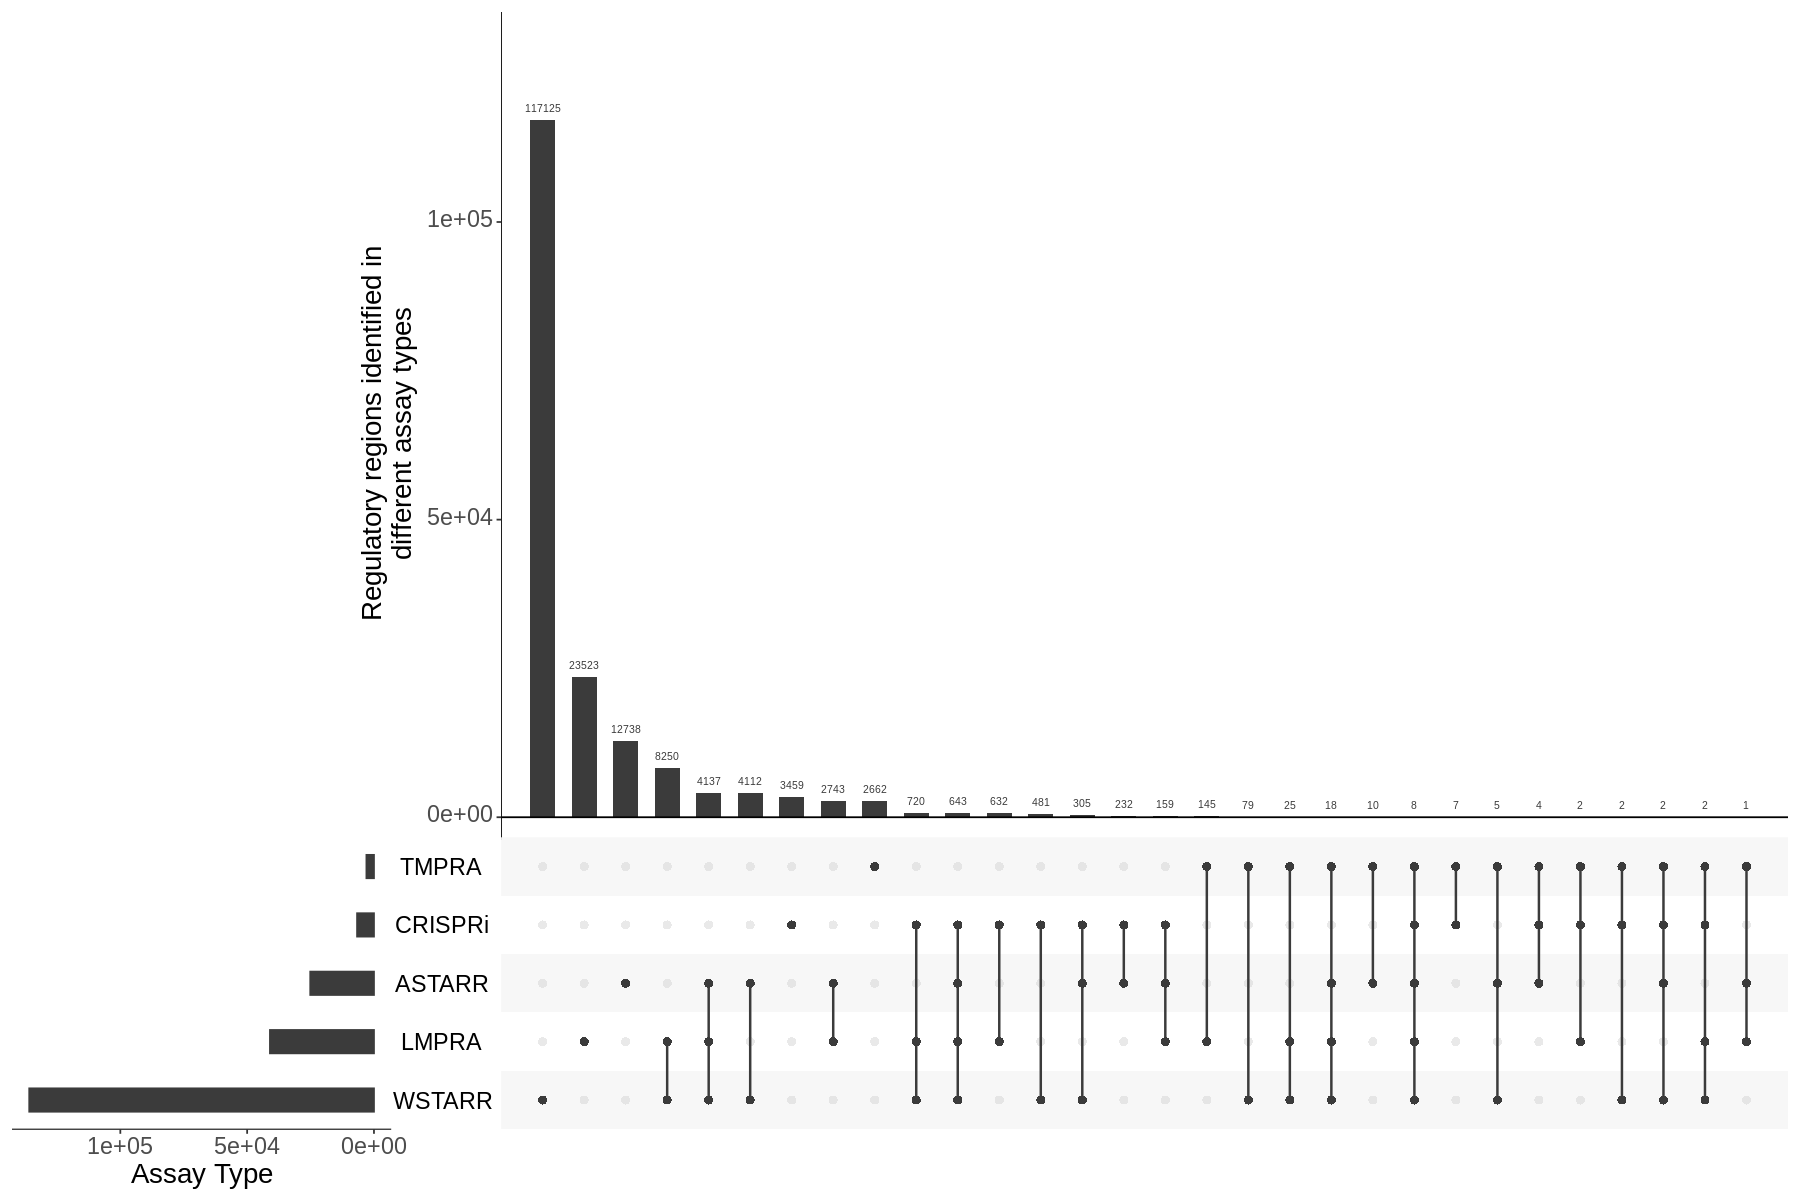

In [104]:
lst = lst_summary

options(repr.plot.height=10, repr.plot.width=15)
upset(fromList(lst), 
      order.by = "freq", 
      nsets = 7,
      mainbar.y.label = "Regulatory regions identified in\ndifferent assay types", 
      sets.x.label    = "Assay Type", 
      text.scale = c(2, 2, 2, 2, 2, 1))

* TMPRA : 2972 
* CRISPRi : 6708 
* ASTARR : 25117 
* LMPRA : 41008 
* WSTARR : 135914 


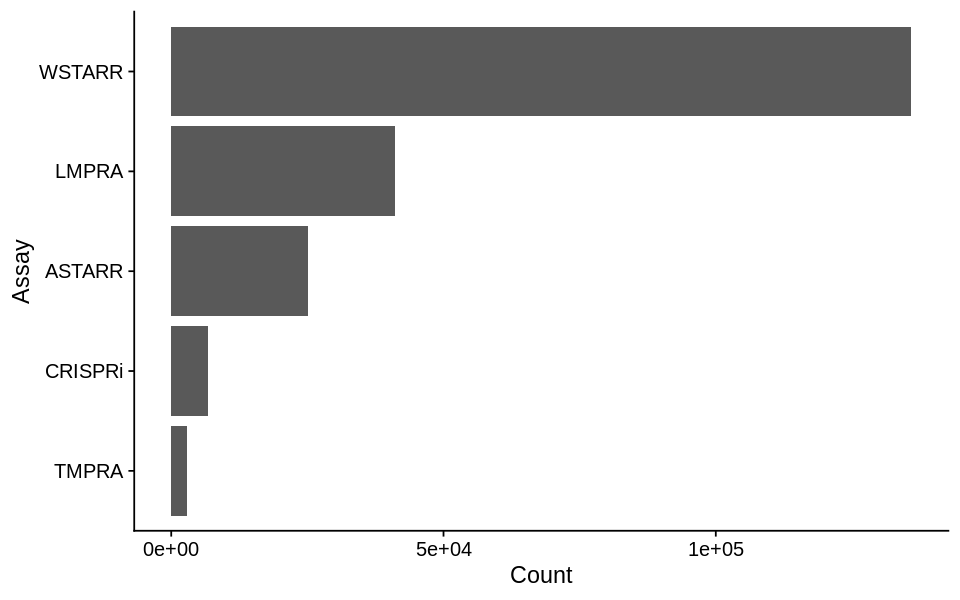

In [105]:
lst = lst_summary
lst = lapply(lst, length)
vec = unlist(lst)
vec = sort(vec)
for (idn in names(vec)){
    cat("*", idn, ":", vec[idn], "\n")
}

# ++++++++++++++++++++++++++++++++++++++++++++
dat = data.frame(
    "Assay"  = names(vec),
    "Count"  = vec
)
dat = dat %>% 
    dplyr::arrange(Count) %>% 
    dplyr::mutate(Assay=factor(Assay, levels=Assay))
gpt = ggplot(dat, aes(x=Assay, y=Count)) + 
    geom_col() + 
    coord_flip() +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [137]:
dat = dat_peak_arrange
dat = dat %>% 
    tidyr::separate_longer_delim(Assay_Type, ",") %>% 
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "CRISPRi"),
            "CRISPRi",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "STARR"),
            "STARR",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "MPRA"),
            "MPRA",
            Assay_Type
        )
    )

dat_summary = dat
head(dat)

Assay_Type,Assay_Label,Name
<chr>,<chr>,<chr>
STARR,ASTARR_R,chr1:136520-136950
STARR,ASTARR_R,chr1:137050-137150
STARR,ASTARR_R,chr1:181600-181790
STARR,WSTARR_A,chr1:184330-184480
MPRA,LMPRA_A,chr1:203225-203425
CRISPRi,CRISPRi-Growth,chr1:605550-605627


In [138]:
dat = dat_summary
lst = split(dat$Name, dat$Assay_Type)

lst_summary = lst
print(length(lst))
lapply(lst, length)

[1] 3


$CRISPRi
[1] 6708

$MPRA
[1] 43980

$STARR
[1] 161031

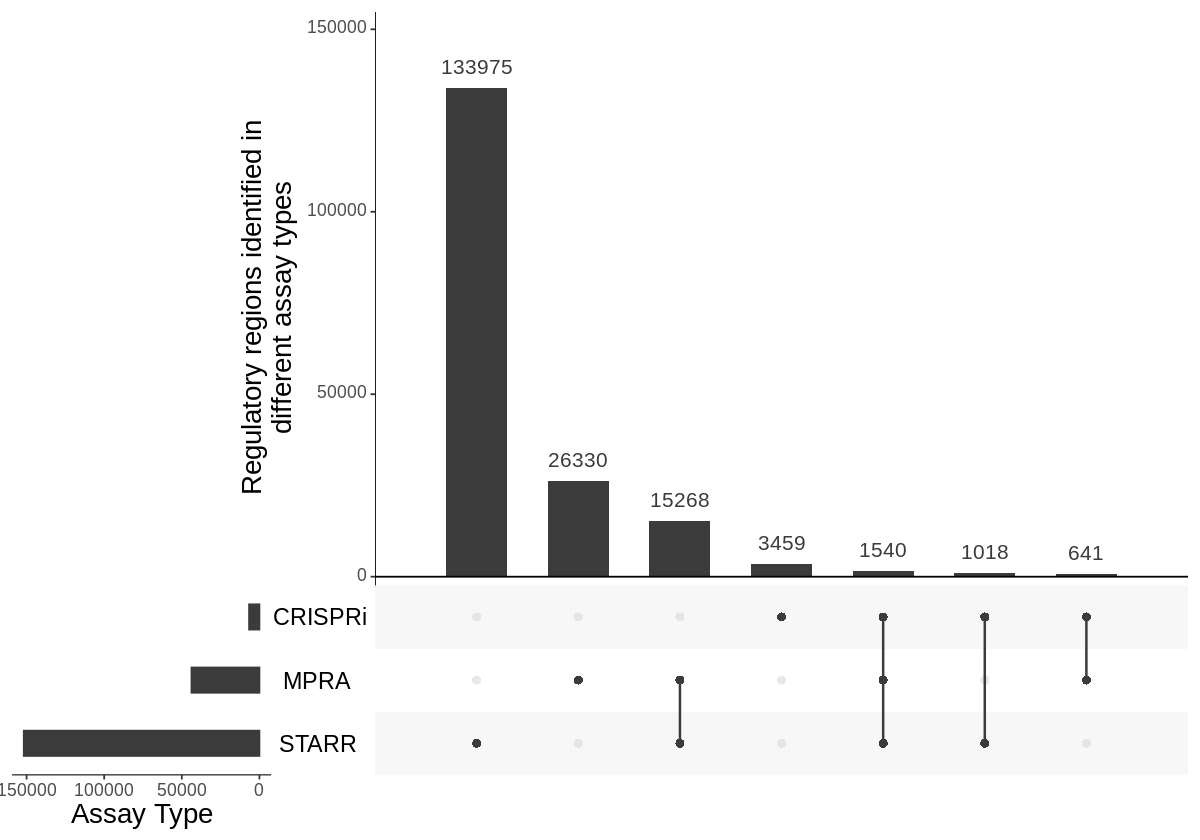

In [139]:
lst = lst_summary

options(repr.plot.height=7, repr.plot.width=10)
upset(fromList(lst), 
      order.by = "freq", 
      nsets = 7,
      mainbar.y.label = "Regulatory regions identified in\ndifferent assay types", 
      sets.x.label    = "Assay Type", 
      text.scale = c(2, 1.5, 2, 1.5, 2, 2))

* CRISPRi : 6708 
* MPRA : 43980 
* STARR : 161031 


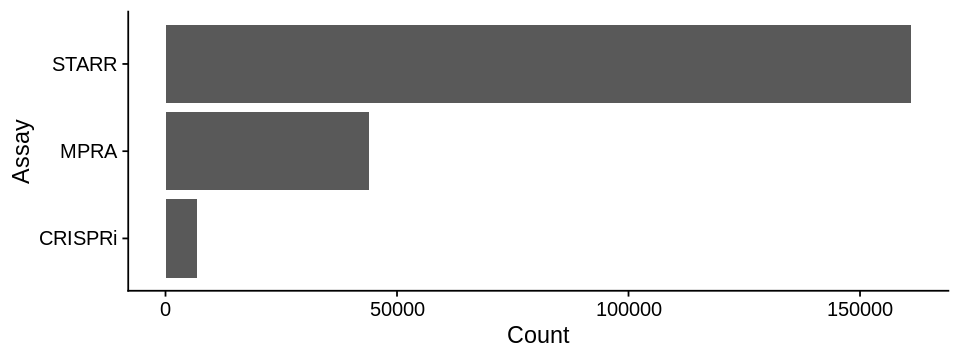

In [140]:
lst = lst_summary
lst = lapply(lst, length)
vec = unlist(lst)
vec = sort(vec)
for (idn in names(vec)){
    cat("*", idn, ":", vec[idn], "\n")
}

# ++++++++++++++++++++++++++++++++++++++++++++
dat = data.frame(
    "Assay"  = names(vec),
    "Count"  = vec
)
dat = dat %>% 
    dplyr::arrange(Count) %>% 
    dplyr::mutate(Assay=factor(Assay, levels=Assay))
gpt = ggplot(dat, aes(x=Assay, y=Count)) + 
    geom_col() + 
    coord_flip() +
    theme_cowplot()

options(repr.plot.height=3, repr.plot.width=8)
print(gpt)

In [141]:
dat = dat_peak_arrange
dat = dat %>% 
    tidyr::separate_longer_delim(Assay_Type, ",") %>% 
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "CRISPRi"),
            "CRISPRi",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "STARR"),
            "STARR_A",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "MPRA"),
            "MPRA_A",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Direction = ifelse(
            str_detect(Assay_Label, "STARR_A|MPRA_A"),
            "ACTIVE",
            "REPRESS"
        )
    )
dat = dat %>% dplyr::filter(Direction == "ACTIVE")
dat_summary = dat
head(dat)

Assay_Type,Assay_Label,Name,Direction
<chr>,<chr>,<chr>,<chr>
STARR_A,WSTARR_A,chr1:184330-184480,ACTIVE
MPRA_A,LMPRA_A,chr1:203225-203425,ACTIVE
STARR_A,"WSTARR_A,WSTARR_AB,LMPRA_A,ASTARR_A",chr1:778400-779100,ACTIVE
MPRA_A,"WSTARR_A,WSTARR_AB,LMPRA_A,ASTARR_A",chr1:778400-779100,ACTIVE
STARR_A,"WSTARR_A,WSTARR_AB,LMPRA_A,ASTARR_A",chr1:778400-779100,ACTIVE
STARR_A,WSTARR_A,chr1:818780-818990,ACTIVE


In [142]:
dat = dat_summary
lst = split(dat$Name, dat$Assay_Type)

lst_summary = lst
print(length(lst))
lapply(lst, length)

[1] 3


$CRISPRi
[1] 2981

$MPRA_A
[1] 42601

$STARR_A
[1] 92448

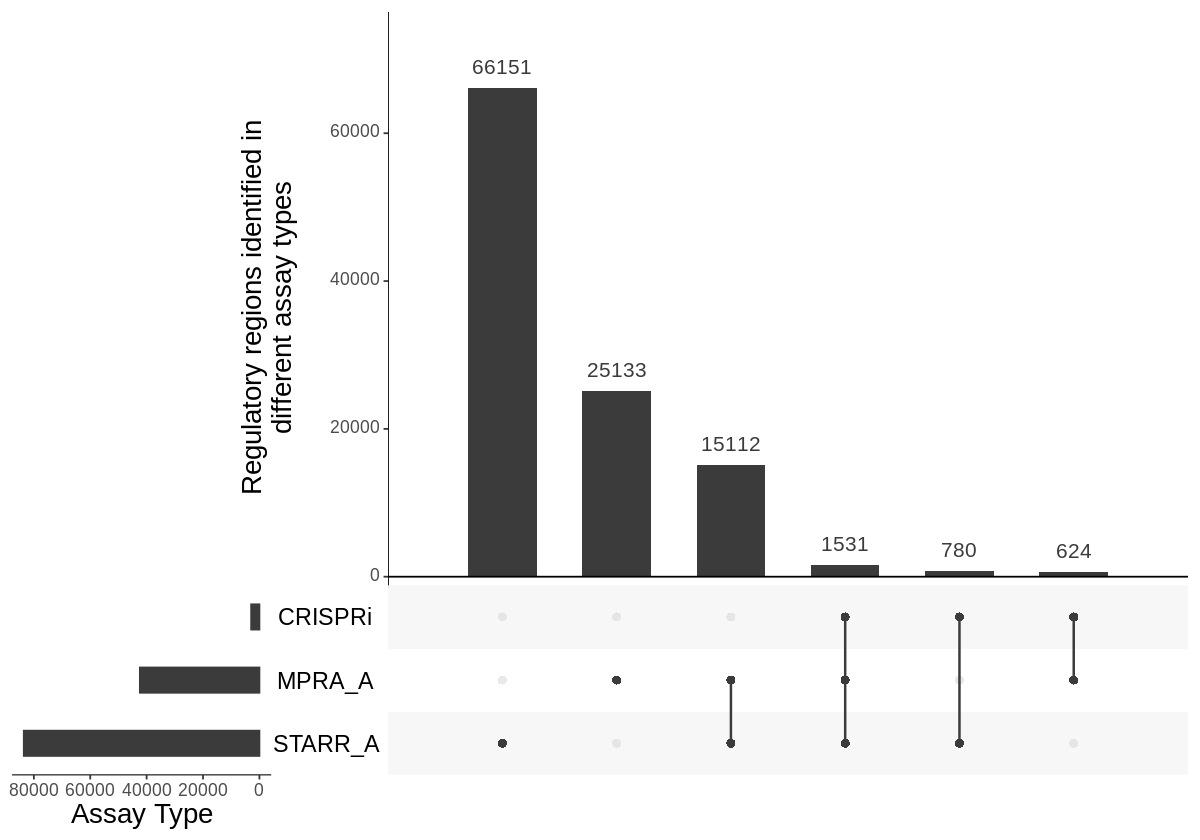

In [143]:
lst = lst_summary

options(repr.plot.height=7, repr.plot.width=10)
upset(fromList(lst), 
      order.by = "freq", 
      nsets = 7,
      mainbar.y.label = "Regulatory regions identified in\ndifferent assay types", 
      sets.x.label    = "Assay Type", 
      text.scale = c(2, 1.5, 2, 1.5, 2, 2))

* CRISPRi : 2981 
* MPRA_A : 42601 
* STARR_A : 92448 


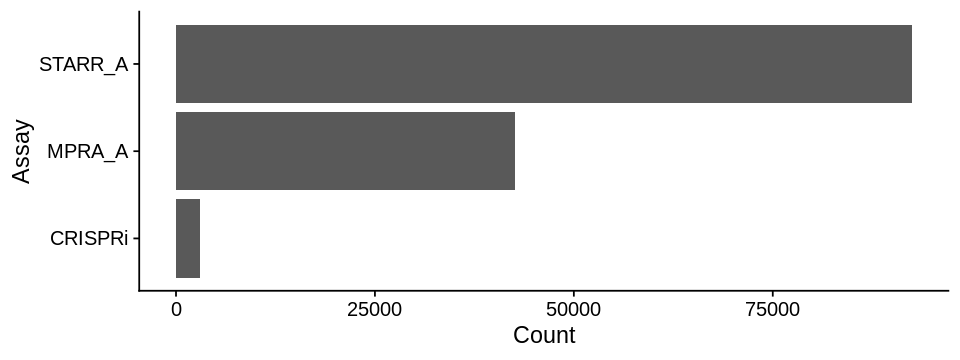

In [144]:
lst = lst_summary
lst = lapply(lst, length)
vec = unlist(lst)
vec = sort(vec)
for (idn in names(vec)){
    cat("*", idn, ":", vec[idn], "\n")
}

# ++++++++++++++++++++++++++++++++++++++++++++
dat = data.frame(
    "Assay"  = names(vec),
    "Count"  = vec
)
dat = dat %>% 
    dplyr::arrange(Count) %>% 
    dplyr::mutate(Assay=factor(Assay, levels=Assay))
gpt = ggplot(dat, aes(x=Assay, y=Count)) + 
    geom_col() + 
    coord_flip() +
    theme_cowplot()

options(repr.plot.height=3, repr.plot.width=8)
print(gpt)

In [145]:
dat = dat_peak_arrange
dat = dat %>% 
    tidyr::separate_longer_delim(Assay_Type, ",") %>% 
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "CRISPRi"),
            "CRISPRi",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "STARR"),
            "STARR_R",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "MPRA"),
            "MPRA_R",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Direction = ifelse(
            str_detect(Assay_Label, "STARR_A|MPRA_A"),
            "ACTIVE",
            "REPRESS"
        )
    )
dat = dat %>% dplyr::filter(Direction == "REPRESS")
dat_summary = dat
head(dat)

Assay_Type,Assay_Label,Name,Direction
<chr>,<chr>,<chr>,<chr>
STARR_R,ASTARR_R,chr1:136520-136950,REPRESS
STARR_R,ASTARR_R,chr1:137050-137150,REPRESS
STARR_R,ASTARR_R,chr1:181600-181790,REPRESS
CRISPRi,CRISPRi-Growth,chr1:605550-605627,REPRESS
STARR_R,WSTARR_R,chr1:822090-822250,REPRESS
STARR_R,ASTARR_R,chr1:869810-870100,REPRESS


In [146]:
dat = dat_summary
lst = split(dat$Name, dat$Assay_Type)

lst_summary = lst
print(length(lst))
lapply(lst, length)

[1] 3


$CRISPRi
[1] 3727

$MPRA_R
[1] 1379

$STARR_R
[1] 68583

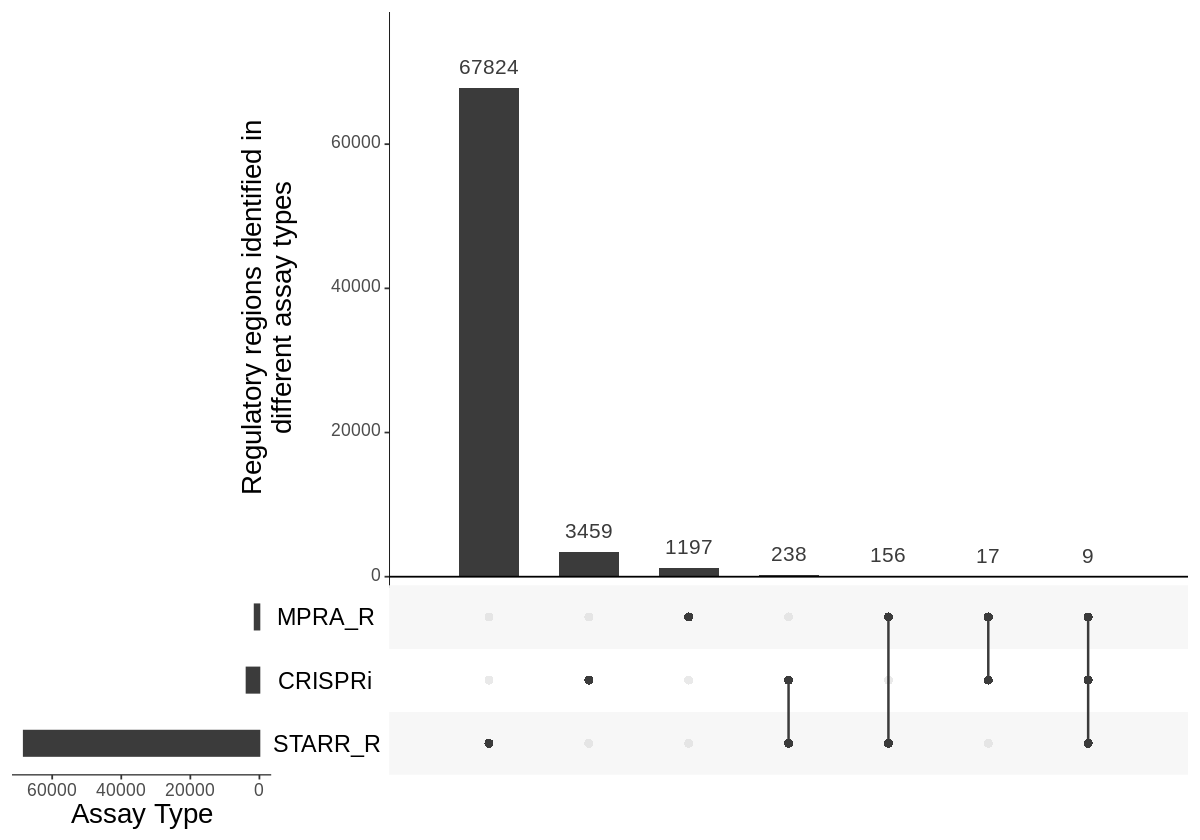

In [147]:
lst = lst_summary

options(repr.plot.height=7, repr.plot.width=10)
upset(fromList(lst), 
      order.by = "freq", 
      nsets = 7,
      mainbar.y.label = "Regulatory regions identified in\ndifferent assay types", 
      sets.x.label    = "Assay Type", 
      text.scale = c(2, 1.5, 2, 1.5, 2, 2))

* MPRA_R : 1379 
* CRISPRi : 3727 
* STARR_R : 68583 


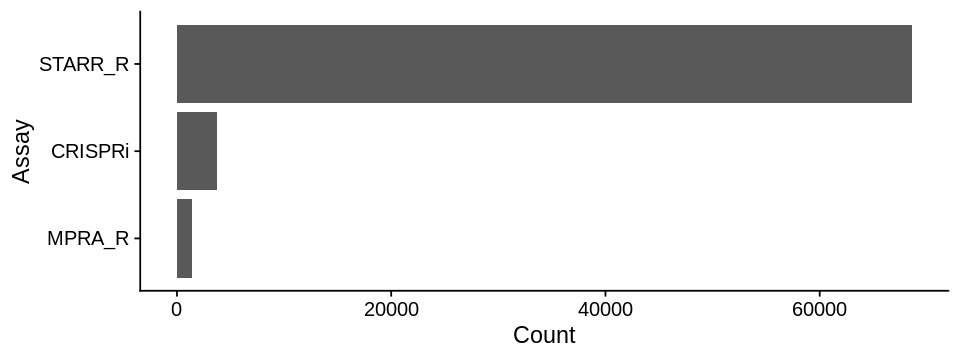

In [148]:
lst = lst_summary
lst = lapply(lst, length)
vec = unlist(lst)
vec = sort(vec)
for (idn in names(vec)){
    cat("*", idn, ":", vec[idn], "\n")
}

# ++++++++++++++++++++++++++++++++++++++++++++
dat = data.frame(
    "Assay"  = names(vec),
    "Count"  = vec
)
dat = dat %>% 
    dplyr::arrange(Count) %>% 
    dplyr::mutate(Assay=factor(Assay, levels=Assay))
gpt = ggplot(dat, aes(x=Assay, y=Count)) + 
    geom_col() + 
    coord_flip() +
    theme_cowplot()

options(repr.plot.height=3, repr.plot.width=8)
print(gpt)